<a href="https://colab.research.google.com/github/ilmaaliyaf/learn-deep-learning/blob/main/P2_10117019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
class regression(object):
    ''' doing regression '''
    def __init__(self, dataset_train, dataset_test, 
                 features, target_feature,
                 normalize=False, num_iterations = 2000, 
                 learning_rate = 0.5, print_cost=False):
        
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.print_cost = print_cost
        self.features = features
        self.tfeature = target_feature
        # self.quadratic = quadratic
        
        self.X_train = []
        self.y_train = []
        self.gradients, self.costs = 0, 0
        self.parameter = {}
        self.result = {}

        if normalize:
            self.dataset_train = self.normalized(dataset_train)
            self.dataset_test = self.normalized(dataset_test)
        else:
            self.dataset_train = dataset_train
            self.dataset_test = dataset_test
        
        X_train, y_train = self.split(self.dataset_train)
        self.train(X_train, y_train)
        
        X_test, y_test = self.split(self.dataset_test)
        self.test_result = self.test(X_test, y_test)
    
    def normalized(self, ds):
        for feature in self.features:
            mean = ds.mean()
            std = ds.std()
            ds.fillna(mean, inplace=True)
            ds = (ds-mean) / (std-0.00001)
            return ds
    
    def split(self, ds):
        data = ds.copy()
        y = data.pop(self.tfeature).to_numpy()
        y = np.expand_dims(y, 1)
        X = data.to_numpy()
        return X, y
        
    def initialize_numbers(self, num_features, arg='random'):
        if arg == 'zeros':
            w = np.zeros(num_fetures, 1)
            b = np.zeros(1)
        else:
            w = np.random.rand(num_features, 1)
            b = np.random.rand(1)
        return w, b

    def propagate(self, w, b, X, Y):
        N = X.shape[0]

        # Forward
        Z = np.dot(X, w) + b
        e = Y - Z
        C = np.dot(e.T, e) / N

        # Backward
        dz = -2 * e / N
        dw = np.dot(X.T, dz)
        db = np.sum(dz)

        grads = {"dw": dw,
                 "db": db}    
        return grads, C
    
    
    def optimize(self, w, b, X, Y):
        ''' This function will update the parameters, gradients, and cost '''
        costs = []

        for i in range(self.num_iterations):
            gradients, cost = self.propagate(w, b, X, Y)

            w = w - self.learning_rate * gradients['dw']
            b = b - self.learning_rate * gradients['db']

            # catat nilai cost setiap iterasi ke-100
            if i % 100 == 0:
                costs.append(cost)        
                if self.print_cost:
                    print("Cost after iteration %i: %f" %(i, cost))

        self.parameters = {"w": w, "b": b}
        self.gradients = gradients
        self.costs = costs
    
    def print_accuracy(self, Y, Y_pred, types):
        accuracy = np.mean(np.abs(Y_pred - Y)) * 100
        print("{} accuracy: {} %".format(types, accuracy))
        
    def predict(self, w, b, X):
        return np.dot(X, w) + b
    
    def train(self, X, Y, plot=True):
        w, b = self.initialize_numbers(X.shape[1])
        
        self.optimize(w, b, X, Y)
        
        Y_pred = self.predict(w, b, X)
        
        self.print_accuracy(Y, Y_pred, "train")
        self.result = {
                "costs": self.costs,
                "prediction" : Y_pred, 
                "w" : self.parameters['w'], 
                "b" : self.parameters['b'],
                }
        
        self.plot(X, Y, self.result, 'train')
        
    def test(self, X, Y, plot=True):
        Y_pred = self.predict(self.parameters['w'], self.parameters['b'], X)
        self.print_accuracy(Y, Y_pred, "test")   
        self.plot(X, Y, self.result, 'test')
        
    def plot(self, X, Y, result, types):
        if types == 'train':
            c = 'blue'
            n = 1
        else:
            c = 'green'
            n = 2
        
        plt.figure(n)
        x_res = np.arange(X.min(), X.max(), 0.1)
        y_res = result['w'][0] * x_res + result['b']
        plt.scatter(X, Y, color=c)
        plt.plot(x_res, y_res, color = "red")

train accuracy: 158.81647258389725 %
test accuracy: 49.73978971622577 %


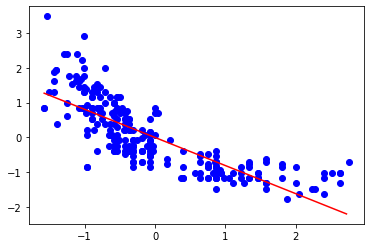

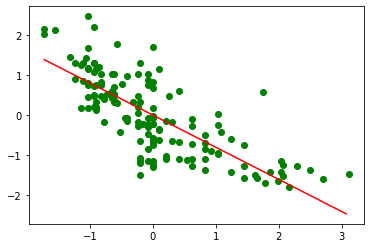

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

features = ['Horsepower', 'MPG']
dataset_train = raw_dataset[features]
# split the data into training set and testing set
dataset_test = dataset_train.tail(len(dataset_train)-250)
dataset_train = dataset_train.head(250)

result1 = regression(dataset_train, dataset_test, features, 'MPG', normalize=True)

train accuracy: 99.37802780383073 %
test accuracy: 78.73818313672646 %

Data training:
       housing_median_age  median_house_value
count        1.700000e+04        1.700000e+04
mean         2.351089e-14       -4.114160e-16
std          1.000001e+00        1.000000e+00
min         -2.191905e+00       -1.658007e+00
25%         -8.412977e-01       -7.578726e-01
50%          3.262489e-02       -2.319369e-01
75%          6.682050e-01        4.974756e-01
max          1.859918e+00        2.523630e+00

Data test:
       housing_median_age  median_house_value
count        3.000000e+03        3.000000e+03
mean         8.800368e-17        5.639933e-17
std          1.000001e+00        1.000000e+00
min         -2.217800e+00       -1.620817e+00
25%         -8.637993e-01       -7.482895e-01
50%          1.231875e-02       -2.492605e-01
75%          6.494955e-01        5.138692e-01
max          1.844202e+00        2.600385e+00


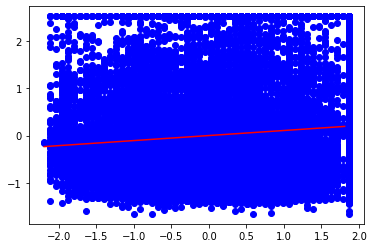

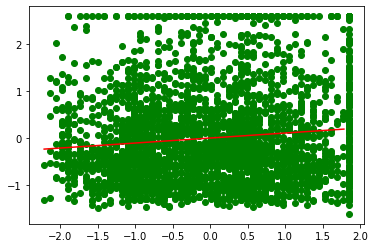

In [ ]:
# CALIFORNIA HOUSING DATA, PREDICT MEDIAN HOUSE VALUE AS A FUNCTION OF HOUSING MEDIAN AGE
# features = ['total_rooms', 'total_bedrooms', 'population', 'housing_median_age', 'median_house_value']

features = ['housing_median_age', 'median_house_value']
target_feature = features[1]
dataset_train = pd.read_csv("sample_data/california_housing_train.csv")[features]
dataset_test = pd.read_csv("sample_data/california_housing_test.csv")[features]
result2 = regression(dataset_train, dataset_test,
                     features, target_feature,
                     normalize=True)
print("\nData training:")
print(result2.dataset_train.describe())
print("\nData test:")
print(result2.dataset_test.describe())

Untuk kedua data, diperoleh training accuracy yang cukup tinggi. Namun, testing accuracynya sangat berbeda jauh.

Untuk data pertama, saya kira akan lebih cocok untuk dilakukan regresi polinom (kuadratik), seperti yang dicontohkan pada sesi praktikum.

Unutk data kedua, cukup sulit untuk melihat apakah hubungan antara kedua feature pada data tersebut linear atau tidak.